<a href="https://colab.research.google.com/github/dennkitotaichi/CE_PLUS/blob/patch-1/light_GBM_sono13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving testTotal2019.csv to testTotal2019.csv


     Unnamed: 0  ...  Average cloud volume (10 pct)
0      2016/9/1  ...                            4.3
1      2016/9/2  ...                            9.5
2      2016/9/3  ...                           10.0
3      2016/9/4  ...                           10.0
4      2016/9/5  ...                            8.3
...         ...  ...                            ...
1090  2019/8/27  ...                            3.8
1091  2019/8/28  ...                           10.0
1092  2019/8/29  ...                           10.0
1093  2019/8/30  ...                            7.8
1094  2019/8/31  ...                            6.3

[1095 rows x 24 columns]
     Unnamed: 0  ...  Average cloud volume (10 pct)
0      2016/9/1  ...                            4.3
1      2016/9/2  ...                            9.5
2      2016/9/3  ...                           10.0
3      2016/9/4  ...                           10.0
4      2016/9/5  ...                            8.3
...         ...  ...                  

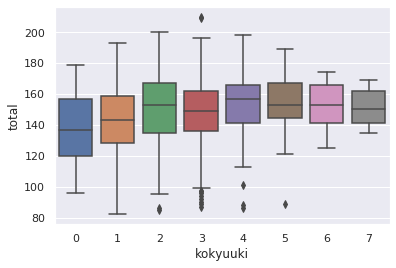

In [4]:
import pandas as pd

dt = pd.read_csv('testTotal2019.csv')
print(dt)
df = pd.DataFrame(dt)
print(df)
print(df.columns)
print(df.columns[[0]])
print(df.drop(df.columns[[0]], axis=1))
dtt=df.drop(df.columns[[0]], axis=1)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set()
import collections
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras import layers
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
sns.boxplot(x="kokyuuki", y="total", data=dtt)

import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import r2_score

import random

from pandas.plotting import scatter_matrix

                             Name  Coefficients
1                             man     -1.380895
2                           woman     -1.366668
5                        kaitouOP     -0.298966
7                       kaifukuOP     -0.186088
10                         elseOP     -0.120224
12           Lowest temperature ?     -0.116004
8                        honenoOP     -0.059255
13          Maximum temperature ?     -0.021475
17            Total snowfall (cm)     -0.008652
16              Deepest Snow (cm)     -0.005339
20   Average local pressure (hPa)      0.001580
14       Total precipitation (mm)      0.002979
9                     fukukuukyou      0.008026
19  Minimum relative humidity (%)      0.008608
3                      sinndennzu      0.009397
21  Average cloud volume (10 pct)      0.011035
15         Daylight Hours (Hours)      0.014432
18          Total snowfall (cm).1      0.015505
11        Average temperature (C)      0.086181
4                        sirinnji      0

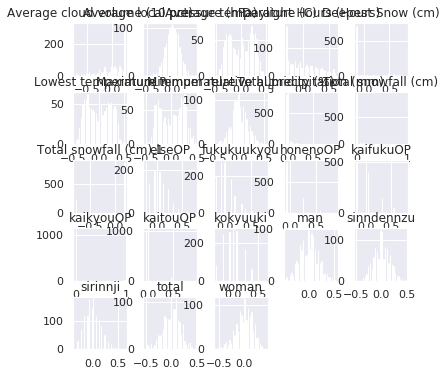

[0.6484375 0.6171875 0.578125  ... 0.3203125 0.3125    0.1953125]
[0.56756757 0.55405405 0.58108108 ... 0.35135135 0.35135135 0.27027027]
[0.56756757 0.55405405 0.58108108 ... 0.35135135 0.35135135 0.27027027]
X.shape
(1095, 3)
(1095,)
予測対象： [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 3 3 3 3 4 4 3 3 2 3 3 3 5 4 4 4 3 4 4 3
 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 3 6 5 5 6 7 7 6 5 3 4 4 3 4 3
 2 3 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 3 3 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 2 3 2 3 3 3 4 3 4 5 5 5 5 5 5 5 5 4 4 5 5 5 3 3 3
 3 3 3 3 1 3 3 2 2 3 1 1 0 1 0 0 0 1 1 2 2 2 1 1 1 1 2 2 1 1 2 2 2 3 3 3 3
 2 3 3 3 2 4 2 2 2 2 2 3 2 2 2 2 3 3 3 3 3 3 3 3 2 2 1 1 1 2 2 2 2 3 3 2 2
 4 3 2 3 3 3 3 3 4 4 3 2 2 2 2 2 2 2 2 3 2 3 2 2 1 1 0 0 1 1 1 1 1 0 0 0 0
 0 1 1 1 1 2 2 1 1 1 1 3 2 2 2 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 2
 2 2 1 2 2 1 0 0 0 0 0 0 1 1 1 1 1 1 2 2 3 3 2 0 0 0 0 0 0 0 0 1 1] , 予測結果→ [ 1.62585530e+00  3.14455641e+00  8.20684053e-01  1.98368134e+00
  3.21335094e+00 

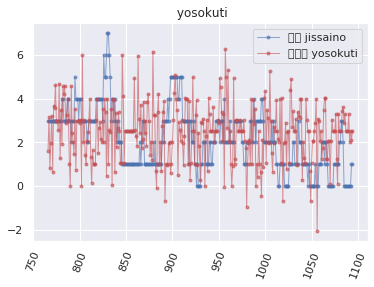

Fitting 4 folds for each of 864 candidates, totalling 3456 fits
[CV] bagging_fraction=1.0, learning_rate=0.001, max_bin=255, max_depth=-1, min_data_leaf=10, n_estimators=10, num_iterations=150, num_leaves=10 
[CV]  bagging_fraction=1.0, learning_rate=0.001, max_bin=255, max_depth=-1, min_data_leaf=10, n_estimators=10, num_iterations=150, num_leaves=10, total=   0.0s
[CV] bagging_fraction=1.0, learning_rate=0.001, max_bin=255, max_depth=-1, min_data_leaf=10, n_estimators=10, num_iterations=150, num_leaves=10 
[CV]  bagging_fraction=1.0, learning_rate=0.001, max_bin=255, max_depth=-1, min_data_leaf=10, n_estimators=10, num_iterations=150, num_leaves=10, total=   0.0s
[CV] bagging_fraction=1.0, learning_rate=0.001, max_bin=255, max_depth=-1, min_data_leaf=10, n_estimators=10, num_iterations=150, num_leaves=10 
[CV]  bagging_fraction=1.0, learning_rate=0.001, max_bin=255, max_depth=-1, min_data_leaf=10, n_estimators=10, num_iterations=150, num_leaves=10, total=   0.0s
[CV] bagging_fraction

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bagging_fraction=1.0, learning_rate=0.001, max_bin=255, max_depth=-1, min_data_leaf=10, n_estimators=10, num_iterations=150, num_leaves=20, total=   0.1s
[CV] bagging_fraction=1.0, learning_rate=0.001, max_bin=255, max_depth=-1, min_data_leaf=10, n_estimators=10, num_iterations=150, num_leaves=20 
[CV]  bagging_fraction=1.0, learning_rate=0.001, max_bin=255, max_depth=-1, min_data_leaf=10, n_estimators=10, num_iterations=150, num_leaves=20, total=   0.1s
[CV] bagging_fraction=1.0, learning_rate=0.001, max_bin=255, max_depth=-1, min_data_leaf=10, n_estimators=10, num_iterations=150, num_leaves=20 
[CV]  bagging_fraction=1.0, learning_rate=0.001, max_bin=255, max_depth=-1, min_data_leaf=10, n_estimators=10, num_iterations=150, num_leaves=20, total=   0.1s
[CV] bagging_fraction=1.0, learning_rate=0.001, max_bin=255, max_depth=-1, min_data_leaf=10, n_estimators=10, num_iterations=150, num_leaves=31 
[CV]  bagging_fraction=1.0, learning_rate=0.001, max_bin=255, max_depth=-1, min_data_

[Parallel(n_jobs=1)]: Done 3456 out of 3456 | elapsed:  3.8min finished


In [7]:
from sklearn import linear_model
clf = linear_model.LinearRegression()


# 説明変数に "kokyuuki(kokyuukiスコア以外すべて)" を利用
wine_except_quality = dtt.drop('kokyuuki', axis=1)
X = wine_except_quality.values
 
# 目的変数に "kokyuuki" を利用
Y = dtt['kokyuuki'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":wine_except_quality.columns,
                    "Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)


print("------------------------------------------------------------")

 
# データフレームの各列を正規化
wine2 = dtt.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
wine2.head()
 
wine2.hist(bins=30,rwidth=0.2 ,figsize=(6,6), color = 'orange') ;
plt.tight_layout()
plt.show()

sirinnji = df['total'].values
sirinnji2 = preprocessing.minmax_scale(sirinnji)
print(sirinnji2)

kaifukuOP = df['woman'].values
kaifukuOP2 = preprocessing.minmax_scale(kaifukuOP)
print(kaifukuOP2)

youso3 = df['man'].values
youso3seikika = preprocessing.minmax_scale(kaifukuOP)
print(youso3seikika)

sika=np.array([sirinnji2,kaifukuOP2,youso3])
si=sika.T
X=si

print("X.shape")
print(X.shape)

targetk = df['kokyuuki'].values
siY=targetk.T
Y=siY


print(Y.shape)

# 訓練用のデータと、テスト用のデータに分ける
N_train = int(len(df) * 0.70)
N_test = len(df) - N_train
X_train, X_test, y_train, y_test = \
    train_test_split(X, Y, test_size=N_test, shuffle = False) 

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression


from sklearn import svm  
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from sklearn.metrics import r2_score


lgb_params = {
   'reg_lambda': 0.0,
   'reg_alpha': 0.0,
   'num_leaves': 600,
   'n_estimators': 30000,
   'min_data_leaf': 50,
   'learning_rate': 0.025,
   'bagging_fraction': 0.8,
            }

lgb_model = lgb.LGBMRegressor(**lgb_params)

# 上記のパラメータでモデルを学習する

# 学習用のデータと結果を学習する,fit(X_train:学習データ, learn_label:答えデータ)
lgb_model.fit(X_train, y_train)
# テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする
Y_pred = lgb_model.predict(X_test)


lgb.LGBMClassifier()
#「LGBMClassifier」のクラスを呼び出して、ハイパーパラメータの初期値を確認

# テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする
Y_pred = lgb_model.predict(X_test)

# テスト結果を評価する,accuracy_score()
print("予測対象：", y_test, ", 予測結果→", Y_pred)

from sklearn.metrics import mean_absolute_error
print("平均絶対誤差 (MAE, Mean Absolute Error") 
print(mean_absolute_error(y_test, Y_pred))

## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(y_test,Y_pred)))

## test_r2_score計算
test_r2_score = r2_score(y_test,Y_pred)
print("test_r2_score")
print(test_r2_score)

## 予測結果をプロット
pre_date = df.index[-len(y_test):].values
plt.title(" yosokuti")
plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="実際 jissaino  ", linewidth=1)
plt.plot(pre_date, Y_pred, 'r', alpha=0.6, marker='.', label="予測値 yosokuti", linewidth=1)
plt.xticks(rotation=70)
plt.legend()
plt.grid(True)
plt.show()


from sklearn.metrics import classification_report

 #Grid searcharn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
 # use a full grid over all parameters

def lgb_params2():
   ret = {
        # 0.0以上1.0以下を3分割したarrayを作る
   #'reg_lambda':[0,0.1,1],
   #'reg_alpha':[0,0.1,1],
   'num_leaves':[10,20,31],
   'max_depth':[-1,-3],
   'max_bin':[255,500],
   'n_estimators':[10,50,100],
   'min_data_leaf': [10,20,30],
   'learning_rate': [0.001,0.01],
   'num_iterations': [150,300],
   'bagging_fraction':[1.0,0.9],
   }
   return ret

gscv = GridSearchCV(lgb.LGBMRegressor(), lgb_params2(), cv=4, verbose=2)
gscv.fit(X_train, y_train)

gs_result = pd.DataFrame.from_dict(gscv.cv_results_)
print('gs_result')
print(gs_result)


gs_result
     mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0         0.030625      0.003364  ...        0.126828                1
1         0.049660      0.005981  ...        0.127809               73
2         0.050481      0.003987  ...        0.127239              145
3         0.052719      0.003762  ...        0.120660              217
4         0.086292      0.009462  ...        0.120900              289
..             ...           ...  ...             ...              ...
859       0.046358      0.004721  ...        0.153387              577
860       0.047769      0.001380  ...        0.155612              505
861       0.060853      0.005686  ...        0.193045              649
862       0.088680      0.003065  ...        0.200448              793
863       0.092898      0.002290  ...        0.204964              721

[864 rows x 20 columns]
mean_fit_time               0.061305
std_fit_time                0.004458
mean_score_time             0.003049
st

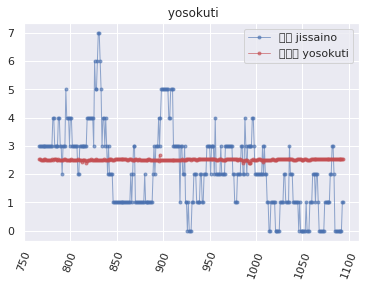

In [8]:
gs_result = pd.DataFrame.from_dict(gscv.cv_results_)
print('gs_result')
print(gs_result)

print(gs_result.mean())

gs_result.to_csv('gs_result2.csv')
  # 最高性能のモデルを取得し、テストデータを分類
best = gscv.best_estimator_
pred = best.predict(X_test)

  # 混同行列を出力
print(pred)

# テスト結果を評価する,accuracy_score()
print("予測対象：", y_test, ", 予測結果→", pred)

from sklearn.metrics import mean_absolute_error
print("平均絶対誤差 (MAE, Mean Absolute Error") 
print(mean_absolute_error(y_test, pred))

## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(y_test,pred)))

## test_r2_score計算
test_r2_score = r2_score(y_test,pred)
print("test_r2_score")
print(test_r2_score)

## 予測結果をプロット
pre_date = df.index[-len(y_test):].values
plt.title(" yosokuti")
plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="実際 jissaino  ", linewidth=1)
plt.plot(pre_date, pred, 'r', alpha=0.6, marker='.', label="予測値 yosokuti", linewidth=1)
plt.xticks(rotation=70)
plt.legend()
plt.grid(True)
plt.show()
